In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)
    
#Function definition to advance MC one step further
def advanceMC(S, P):
    S = int(S)
    P = np.cumsum(P, axis = 1)
    Smax = P.shape[1]
    r = np.random.rand(1)
    if (r<=P[S,0]):
        S = 0
    else:
        for i in range(1, Smax):
            if (r>P[S,i-1])&(r<=P[S,i]):
                S = i
    return S

# Clone MC O times
def cloneMC(S, P, j, O, M):
    R = 0
    for i in range(1, int(O)):
        # Preset current state
        CS = S
        for k in range(j,M-j):
            CS = advanceMC(CS, P)
            if CS == S+1:
                R = R+1
                break
    return R

Elapsed time: 0.157158 seconds.



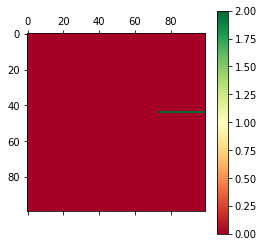

In [35]:
M = 100; # Number of MC samples (Length of chain)
L = 1e2; # Number of initial Simulations
O = 1e3; # Number of Offsprings

# Transition probability
p01 = 0.5
p00 = 1 - p01
p10 = 0.1
p12 = 3.62752e-05 #2.64e-5 + 9.53e-5
p11 = 1-p10-p12
p20 = 0.1
p23 = 1e-4
p22 = 1-p20-p23
p33 = 1

P = np.matrix([[p00, p01, 0, 0],[p10,p11, p12, 0], [p20,0, p22,p23], [0,0,0,p33]])
MC = np.zeros((int(L),int(M)))
P = P[1:,1:]
tic()
for i in range(0,int(L)):
    for j in range(1,int(M)):
        MC[i,j] = advanceMC(MC[i,j-1], P)
toc()
plt.matshow(MC, cmap = "RdYlGn")
plt.colorbar()

In [6]:
M = 100; # Number of MC samples (Length of chain)
L = 1e4; # Number of initial Simulations
O = 1e3; # Number of Offsprings

# Transition probability
p01 = 0.5
p00 = 1 - p01
p10 = 0.1
p12 = (0.013372+0.0047656)/500
p11 = 1-p10-p12
p20 = 0.1
p23 = 1e-4
p22 = 1-p20-p23
p33 = 1

P = np.matrix([[p00, p01, 0, 0],[p10,p11, p12, 0], [p20,0, p22,p23], [0,0,0,p33]])
P = P[1:,1:]
tic()
R2 = 0
R3 = 0
N3 = 0
for i in range(0,int(L)):
    S = 0
    #tic()
    for j in range(1,int(M)):
        #print(j)
        S = advanceMC(S, P) 
        if S == 1:
            R2 = R2 + 1
            N3 = N3 + O
            R3 = R3 + cloneMC(S, P, j, O, M)
    #toc()
    #print(i,S)

p2 = R2/L
p3 = 0
if N3>0:
    p3 = R3/N3
p = p2*p3

print("Failure probability S3: ", p/M)
           
toc()


Failure probability S3:  0.0
Elapsed time: 11.486678 seconds.



In [38]:
R2

0

In [24]:
R3

0

In [199]:
R3

214

In [15]:
L+N3

10000000.0

In [197]:
(0.013372+0.0047656)/500

3.62752e-05